<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2001%20-%20Euler%20Methods/102_Euler_method_with_Theorems_nonlinear_Growth_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euler Method with Theorems Applied to Non-Linear Population Equations
 

The more general form of a first order Ordinary Differential Equation is: 
$$
y^{'}=f(t,y).
$$
This can be solved analytically by integrating both sides but this is not straight forward for most problems.
Numerical methods can be used to approximate the solution at discrete points.
In this notebook we will work through the Euler method for two initial value problems:

1. A non-linear sigmoidal population equation 
$$
y^{'}=0.2 y− 0.01 y^2 ,
$$
2. A non-linear sigmoidal population differential equation with a wiggle,
$$ y^{'}=0.2 y-0.01 y^2+\sin(2\pi t). 
$$



## Euler method

The simplest one step numerical method is the Euler Method named after the most prolific of mathematicians [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (15 April 1707 – 18 September 1783) .

The general Euler formula for to the first order differential equation
$$ 
y^{'} = f(t,y), 
$$
approximates the derivative at time point $t_i$,
$$
y^{'}(t_i) \approx \frac{w_{i+1}-w_i}{t_{i+1}-t_{i}},
 $$
where $w_i$ is the approximate solution of $y$ at time $t_i$.
This substitution changes the differential equation  into a __difference__ equation of the form 
$$ 
\frac{w_{i+1}-w_i}{t_{i+1}-t_{i}}=f(t_i,w_i). 
$$
Assuming uniform stepsize $t_{i+1}-t_{i}$ is replaced by $h$, re-arranging the equation gives
$$ 
w_{i+1}=w_i+hf(t_i,w_i),
$$
 This can be read as the future $w_{i+1}$ can be approximated by the present $w_i$ and the addition of the input to the system $f(t,y)$ times the time step.


In [ ]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

# Non-linear population equation

The general form of the non-linear sigmoidal population growth differential equation is: 
$$ 
y^{'}=\alpha y-\beta y^2,
 $$
where $\alpha$ is the growth rate and $\beta$ is the death rate. The initial population at time $ a $ is 
$$
 y(a)=A, 
 $$
$$
 a\leq t \leq b. 
 $$

## Specific non-linear population equation 
Given the growth rate $$\alpha=0.2,$$ and death rate $$\beta=0.01,$$ giving the specific differential equation,
$$
 y^{'}=0.2 y-0.01 y^2,
  $$
The initial population at time $2000$ is 
$$
 y(2000)=6, 
 $$
we are interested in the time period
$$
 2000\leq t \leq 2020.
  $$

## Initial Condition
To get a specify solution to a first order initial value problem, an __initial condition__ is required.
For our population problem the initial population is 6 billion people:
$$
y(2000)=6.
$$

## General Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
$$
 h=\frac{b-a}{N}.
 $$
## Specific Discrete Interval
Here the interval is $2000\leq t \leq 2020$ with $N=200$ 
$$ 
h=\frac{2020-2000}{200}=0.1,
$$
this gives the 201 discrete points with stepsize h=0.1:
$$ 
t_0=2000, \ t_1=0.1, \ ... t_{200}=2020,
 $$
which is generalised to 
$$
 t_i=2000+i0.1, \ \ \ i=0,1,...,200.
$$
The plot below illustrates the discrete time steps from 2000 to 2002.

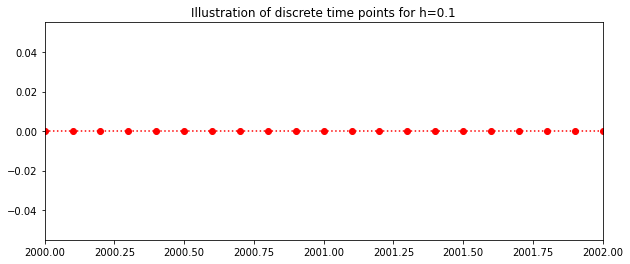

In [ ]:
### Setting up time
t_end=2020.0
t_start=2000.0
N=200
h=(t_end-t_start)/(N)
time=np.arange(t_start,t_end+0.01,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.xlim((2000,2002))
plt.plot();

## Numerical approximation of Population growth
The differential equation is transformed using the Euler method into a difference equation of the form
      $$ 
      w_{i+1}=w_{i}+h (\alpha w_i-\beta w_i\times w_i). 
      $$
This approximates a series of of values $w_0, \ w_1, \ ..., w_{N}$.
For the specific example of the population equation the difference equation is,
      $$
       w_{i+1}=w_{i}+h 0.1 [0.2 w_i-0.01 w_i\times w_i],
        $$
where $i=0,1,2,...,199$, and $w_0=6$. From this initial condition the series is approximated.


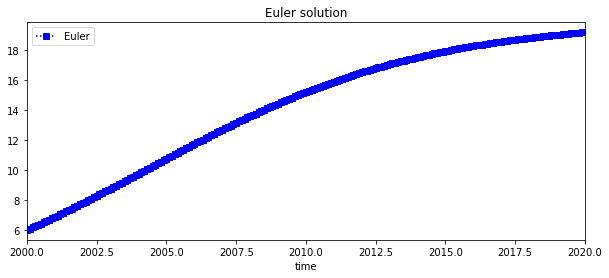

In [ ]:
w=np.zeros(N+1)
w[0]=6
for i in range (0,N):
    w[i+1]=w[i]+h*(0.2*w[i]-0.01*w[i]*w[i])



The plot below shows the Euler approximation $w$ in blue squares. 

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.plot(time,w,'s:',color='blue',label='Euler')
plt.xlim((min(time),max(time)))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Euler solution')
plt.plot();

### Table
The table below shows the iteration $i$, the discrete time point t[i], and the Euler approximation w[i] of the solution $y$ at time point t[i] for the non-linear population equation.

In [ ]:
d = {'time t[i]': time[0:10],    'Euler (w_i) ':w[0:10]}
df = pd.DataFrame(data=d)
df

,time t_i,Euler (w_i)
0,2000.0,6.000000
1,2000.1,6.084000
2,2000.2,6.168665
3,2000.3,6.253986
4,2000.4,6.339953
5,2000.5,6.426557
6,2000.6,6.513788
7,2000.7,6.601634
8,2000.8,6.690085
9,2000.9,6.779130


## Numerical Error
With a numerical solution there are two types of error: 
* local truncation error at one time step; 
* global error which is the propagation of local error. 

### Derivation of  Euler Local truncation error
The left hand side of a initial value problem $\frac{dy}{dt}$ is approximated by __Taylors theorem__ expand about a point $t_0$ giving:
\begin{equation}y(t_1) = y(t_0)+(t_1-t_0)y^{'}(t_0) + \frac{(t_1-t_0)^2}{2!}y^{''}(\xi), \ \ \ \ \ \ \xi \in [t_0,t_1]. \end{equation}
Rearranging and letting $h=t_1-t_0$ the equation becomes
$$
y^{'}(t_0)=\frac{y(t_1)-y(t_0)}{h}-\frac{h}{2}y^{''}(\xi). 
$$
From this the local truncation error is
$$
\tau \leq \frac{h}{2}M  
$$
where $y^{''}(t) \leq M $.
#### Derivation of  Euler Local truncation error for the Population Growth
As the exact solution $y$ is unknown we cannot get an exact estimate of the second derivative
$$
y'(t)=0.2 y-0.01 y^2,
$$
differentiate with respect to $t$,
$$
y''(t)=0.2 y'-0.01 (2yy'),
$$
subbing the original equation gives 
$$
y''(t)=0.2 (0.2 y-0.01 y^2)-0.01 \big(2y(0.2 y-0.01 y^2)\big),
$$
which expresses the second derivative as a function of the exact solution $y$, this is still a problem as the value of $y$ is unknown, to side step this issue we assume the population is between $0\le y \le 20,$ this gives
$$
\max|y''|=M\leq 0.8,
$$
this gives a local trucation for $h=0.1$ for our non-linear equation is
$$
\tau=\frac{h}{2}0.8=0.04. 
$$


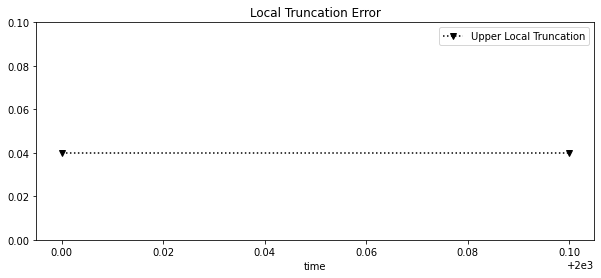

In [ ]:
M=0.8
fig = plt.figure(figsize=(10,4))
plt.plot(time[0:2],0.1*M/2*np.ones(2),'v:'
         ,color='black',label='Upper Local Truncation')
plt.xlabel('time')
plt.ylim([0,0.1])
plt.legend(loc='best')
plt.title('Local Truncation Error')
plt.plot();

### Global truncation error for the population equation
For the population equation specific values $L$ and $M$ can be calculated.

In this case $f(t,y)=\epsilon y$ is continuous and satisfies a Lipschitz Condition with constant
$$ 
\left|\frac{\partial f(t,y)}{\partial y}\right|\leq L, 
$$
$$
 \left|\frac{\partial (0.2 y-0.01 y^2)}{\partial y}\right|\leq |0.2-0.01(2\times y)| \leq |0.2-0.01(2\times 50)|\leq 0.8,
  $$

on $D=\{(t,y)|2000\leq t \leq 2015, 0 < y < 50 \}$ and that a constant $M$
exists with the property that 
$$ 
|y^{''}(t)|\leq M\leq 6.
$$

__Specific Theorem Global Error__

Let $y(t)$ denote the unique solution of the Initial Value Problem
$$ y^{'}=0.2 y-0.01 y^2, \ \ \ 2000\leq t \leq 2020, \ \ \ y(0)=6, $$
and $w_0,w_1,...,w_N$ be the approx generated by the Euler method for some
positive integer N.  Then for $i=0,1,...,N$ the error is:
$$
|y(t_i)-w_i| \leq \frac{6 h}{2\times 0.8}|e^{0.8(t_i-2000)}-1|. 
$$


# Non-linear population equation with a temporal oscilation 
Given the specific population differential equation with a wiggle,
$$ 
y^{'}=0.2 y-0.01 y^2+sin(2\pi t), 
$$
with the initial population at time $2000$ is 
$$ 
y(2000)=6, 
$$
$$ 
2000\leq t \leq 2020. 
$$

For the specific example of the population equation the difference equation is
      $$ 
      w_{i+1}=w_{i}+h 0.5 (0.2 w_i-0.02 w_i\times w_i+sin(2 \pi t), 
      $$
for $i=0,1,...,199$,
where $w_0=6$. From this initial condition the series is approximated.
The figure below shows the discrete solution.

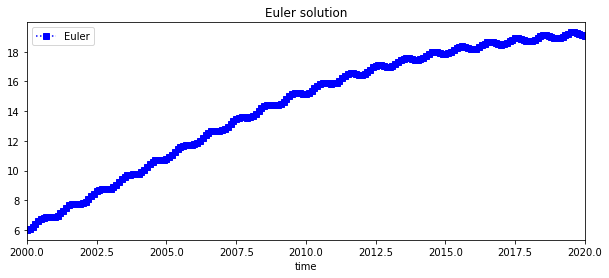

In [ ]:
w=np.zeros(N+1)
w[0]=6
for i in range (0,N):
    w[i+1]=w[i]+h*(0.2*w[i]-0.01*w[i]*w[i]+np.sin(2*np.pi*time[i]))

fig = plt.figure(figsize=(10,4))
plt.plot(time,w,'s:',color='blue',label='Euler')
plt.xlim((min(time),max(time)))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Euler solution')
plt.plot();

### Table
The table below shows the iteration $i$, the discrete time point t[i], and the Euler approximation w[i] of the solution $y$ at time point t[i] for the non-linear population equation with a temporal oscilation.

In [ ]:

d = {'time t_i': time[0:10],    'Euler (w_i) ':w[0:10]}
df = pd.DataFrame(data=d)
df

,time t_i,Euler (w_i)
0,2000.0,6.000000
1,2000.1,6.084000
2,2000.2,6.227443
3,2000.3,6.408317
4,2000.4,6.590522
5,2000.5,6.737676
6,2000.6,6.827034
7,2000.7,6.858187
8,2000.8,6.853211
9,2000.9,6.848203
